In [2]:
#import relevant libraries
import pandas as pd
import datetime
import pyarrow

In [3]:
#read all data files for Jakarta
df0 = pd.read_parquet("part-00000-8bbff892-97d2-4011-9961-703e38972569.c000.snappy.parquet", engine = 'pyarrow')
df1 = pd.read_parquet("part-00001-8bbff892-97d2-4011-9961-703e38972569.c000.snappy.parquet", engine = 'pyarrow')
df2 = pd.read_parquet("part-00002-8bbff892-97d2-4011-9961-703e38972569.c000.snappy.parquet", engine = 'pyarrow')
df3 = pd.read_parquet("part-00003-8bbff892-97d2-4011-9961-703e38972569.c000.snappy.parquet", engine = 'pyarrow')
df4 = pd.read_parquet("part-00004-8bbff892-97d2-4011-9961-703e38972569.c000.snappy.parquet", engine = 'pyarrow')
df5 = pd.read_parquet("part-00005-8bbff892-97d2-4011-9961-703e38972569.c000.snappy.parquet", engine = 'pyarrow')
df6 = pd.read_parquet("part-00006-8bbff892-97d2-4011-9961-703e38972569.c000.snappy.parquet", engine = 'pyarrow')
df7 = pd.read_parquet("part-00007-8bbff892-97d2-4011-9961-703e38972569.c000.snappy.parquet", engine = 'pyarrow')
df8 = pd.read_parquet("part-00008-8bbff892-97d2-4011-9961-703e38972569.c000.snappy.parquet", engine = 'pyarrow')
df9 = pd.read_parquet("part-00009-8bbff892-97d2-4011-9961-703e38972569.c000.snappy.parquet", engine = 'pyarrow')

In [4]:
#combine all data into one
df = df0 + df1 + df2 + df3 + df4 + df5 + df6 + df7 + df8 + df9

In [5]:
# show full summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5602260 entries, 0 to 5602259
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   trj_id         object 
 1   driving_mode   object 
 2   osname         object 
 3   pingtimestamp  float64
 4   rawlat         float64
 5   rawlng         float64
 6   speed          float64
 7   bearing        float64
 8   accuracy       float64
dtypes: float64(6), object(3)
memory usage: 427.4+ MB


We can see that by default, the variables' data types are `object`, `int64` and `float64`. These take up more space than needed, so we should utilise smaller and more efficient dtypes.

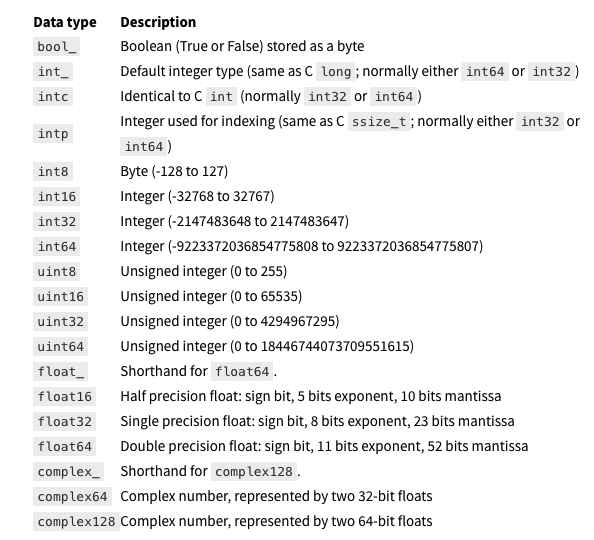

In [43]:
# functions to change dtypes
def to_category(df, *args):
    for col_name in args:
        df[col_name] = df[col_name].astype("category")
    
def to_float32(df, *args):
    for col_name in args:
        df[col_name] = df[col_name].astype("float32")
        
def to_uint16(df, *args):
    for col_name in args:
        df[col_name] = df[col_name].astype("uint16")
  
def to_int32(df, *args):
    for col_name in args:
      df[col_name] = df[col_name].astype("int32")

def format_datetime(df, col_name):
    # get datetime obj for all timestamps
    dt = df[col_name].apply(datetime.datetime.fromtimestamp)
    
    df["time"] = dt.apply(lambda x: x.time())
    df["day_of_week"] = dt.apply(lambda x: x.weekday())
    df["month"] = dt.apply(lambda x: x.month)
    df["year"] = dt.apply(lambda x: x.year)

In [44]:
# get a copy of the df
df_formatted = df.copy()

In [45]:
# format all columns
format_datetime(df_formatted, "pingtimestamp")
to_category(df_formatted, ["trj_id", "driving_mode", "osname"])
to_float32(df_formatted, ["rawlat", "rawlng", "speed", "accuracy"])
to_uint16(df_formatted, ["bearing", "day_of_week", "month", "year"])
to_int32(df_formatted, "pingtimestamp")

In [46]:
# check summary of df again
df_formatted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5598078 entries, 0 to 5598077
Data columns (total 13 columns):
 #   Column         Dtype   
---  ------         -----   
 0   trj_id         category
 1   driving_mode   category
 2   osname         category
 3   pingtimestamp  int32   
 4   rawlat         float32 
 5   rawlng         float32 
 6   speed          float32 
 7   bearing        uint16  
 8   accuracy       float32 
 9   time           object  
 10  day_of_week    uint16  
 11  month          uint16  
 12  year           uint16  
dtypes: category(3), float32(4), int32(1), object(1), uint16(4)
memory usage: 226.7+ MB


There's a significant reduction in memory usage.

In [47]:
df_formatted.describe(include = "all")

,trj_id,driving_mode,osname,pingtimestamp,rawlat,rawlng,speed,bearing,accuracy,time,day_of_week,month,year
count,5598078,5598078,5598078,5.598078e+06,5.598078e+06,5.598078e+06,5.598078e+06,5.598078e+06,5.598078e+06,5598078,5.598078e+06,5598078.0,5598078.0
unique,55995,2,2,NaN,NaN,NaN,NaN,NaN,NaN,85887,NaN,NaN,NaN
top,16886,car,android,NaN,NaN,NaN,NaN,NaN,NaN,18:28:15,NaN,NaN,NaN
freq,1880,3016566,3875093,NaN,NaN,NaN,NaN,NaN,NaN,187,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.555361e+09,-6.256525e+00,1.068258e+02,7.745102e+00,1.713713e+02,6.355750e+00,NaN,3.281662e+00,4.0,2019.0
std,NaN,NaN,NaN,3.634950e+05,1.060743e-01,1.146414e-01,5.176259e+00,1.086076e+02,4.813433e+00,NaN,1.972041e+00,0.0,0.0
min,NaN,NaN,NaN,1.554682e+09,-6.878986e+00,1.058844e+02,-1.000000e+00,0.000000e+00,1.000000e-02,NaN,0.000000e+00,4.0,2019.0
25%,NaN,NaN,NaN,1.555044e+09,-6.296316e+00,1.067699e+02,4.020000e+00,8.300000e+01,3.900000e+00,NaN,2.000000e+00,4.0,2019.0
50%,NaN,NaN,NaN,1.555412e+09,-6.235201e+00,1.068222e+02,7.301215e+00,1.740000e+02,5.000000e+00,NaN,3.000000e+00,4.0,2019.0
75%,NaN,NaN,NaN,1.555674e+09,-6.186357e+00,1.068780e+02,1.049000e+01,2.680000e+02,8.378000e+00,NaN,5.000000e+00,4.0,2019.0


# Introduction to Folium

Folium is a visualization library which builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the leaflet.js library. More information on Leaflet can be found in the docs [here](https://leafletjs.com/)

In [24]:
import folium
from folium import plugins
from branca.element import Figure

# latitude and longitude of Singapore
sg_lat = -6.1754
sg_lng = 106.8272

In [25]:
# create figure
fig = Figure(width = 550, height = 350)

# add map to figure
m = folium.Map(width = 550, height = 350,
               location = [sg_lat, sg_lng],
               zoom_start = 11, min_zoom = 1, max_zoom = 16)
fig.add_child(m)

m

In folium.Map(), there is a parameter to define the tiles for the map. By default, the tiles are set to OpenStreetMap, but Stamen Terrain, Stamen Toner, Mapbox Bright, and Mapbox Control Room, and many other tiles are built in

In [26]:
# create figure
fig = Figure(width = 550, height = 350)

# add map to figure
m = folium.Map(width = 550, height = 350,
               location = [sg_lat, sg_lng],
               zoom_start = 11, min_zoom = 11, max_zoom = 16,
               tiles = "Stamen Terrain")
# can use "Stamen Terrain", "Stamen Toner", "Mapbox Bright", "Mapbox Control Room"
fig.add_child(m)

m

## **Markers**

There are numerous marker types, starting with a simple Leaflet style location marker with a popup and tooltip HTML

In [27]:
example = df.iloc[0,]

# create figure
fig2 = Figure(width = 550, height = 350)

# add map to figure
m2 = folium.Map(location = [sg_lat, sg_lng],
                tiles = 'cartodbpositron',
                zoom_start = 11)
fig2.add_child(m2)

# add marker to the map
folium.Marker(location = [example["rawlat"], example["rawlng"]],
              popup = 'Default popup Marker1',
              tooltip = 'example').add_to(m2)

m2

NameError: name 'df' is not defined

In [16]:
fig3 = Figure(width = 550, height = 350)
m3 = folium.Map(location=[45.372, -121.6972], zoom_start=12, tiles="Stamen Terrain")

tooltip = "Click me!"

folium.Marker(
    [45.3288, -121.6625], popup="<i>Mt. Hood Meadows</i>", tooltip=tooltip
).add_to(m3)
folium.Marker(
    [45.3311, -121.7113], popup="<b>Timberline Lodge</b>", tooltip=tooltip
).add_to(m3)

fig3.add_child(m3)
m3

You can also style your marker with icons and colors

In [17]:
fig4 = Figure(width = 550, height = 350)
m4 = folium.Map(location=[45.372, -121.6972], zoom_start=12, tiles="Stamen Terrain")

folium.Marker(
    location=[45.3288, -121.6625],
    popup="Mt. Hood Meadows",
    icon=folium.Icon(icon="cloud"),
).add_to(m4)

folium.Marker(
    location=[45.3311, -121.7113],
    popup="Timberline Lodge",
    icon=folium.Icon(color="green"),
).add_to(m4)

folium.Marker(
    location=[45.3300, -121.6823],
    popup="Some Other Location",
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(m4)

fig4.add_child(m4)

m4

# LatLong popup

In [18]:
fig5 = Figure(width = 550, height = 350)

m5 = folium.Map(location = [sg_lat, sg_lng], zoom_start = 11)
m5.add_child(folium.LatLngPopup())

fig5.add_child(m5)
m5

In [19]:
fig5 = Figure(width = 550, height = 350)

m5 = folium.Map(width = 550, height = 350,
               location = [sg_lat, sg_lng],
               zoom_start = 11, min_zoom = 11, max_zoom = 16,
               )

folium.Circle(
    radius = 750,
    location = [1.2958, 103.7773],
    popup = "NUS",
    color = "#3186cc",
    fill = True,
    fill_color = "#3186cc"
).add_to(m5)

fig5.add_child(m5)

m5

# Basic exploratory data analysis

This is where we play around a little with the data, to find out interesting trends/patterns/outliers. 

We can also test against simple hypotheses we might have.

**Problem statement**

There has been feedback about <b><font color='red'>delays</font></b> in Grab transport services in both Jakarta and Singapore (late driver arrival -> late arrival at destination). This has led to a decrease in customer satisfaction and trust, which might increase customer turnover. Upon further research, it was found that this could be due to inaccurate ETA prediction, bad route planning, or other factors. Using the above dataset of GPS pings, what insights can your team obtain to help Grab alleviate these issues? 

---

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df_formatted

,trj_id,driving_mode,osname,pingtimestamp,rawlat,rawlng,speed,bearing,accuracy,time,day_of_week,month,year
0,32903,motorcycle,android,1555645295,-6.214046,106.863083,5.310000,114,4.551,03:41:35,4,4,2019
1,19636,car,android,1555481128,-6.225396,106.734489,3.290000,173,3.891,06:05:28,2,4,2019
2,54661,car,android,1554692413,-6.192424,106.848923,0.000000,243,3.000,03:00:13,0,4,2019
3,58169,car,ios,1554889275,-6.288464,106.824966,5.360000,190,10.000,09:41:15,2,4,2019
4,79157,car,ios,1554712604,-6.173193,106.876778,13.136877,190,6.000,08:36:44,0,4,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5598073,4724,car,android,1554974349,-6.302969,106.884743,6.335201,132,3.900,09:19:09,3,4,2019
5598074,40843,motorcycle,android,1555125611,-6.157164,106.792526,0.720000,253,3.787,03:20:11,5,4,2019
5598075,80252,car,android,1555010807,-6.150477,106.888565,24.790001,26,9.000,19:26:47,3,4,2019
5598076,70897,car,ios,1554820720,-6.155914,106.851440,3.759183,250,8.000,14:38:40,1,4,2019


We can start by asking a few questions.



Why delay? What causes delay?
1. too few drivers/too much demand for transport services
2. traffic jam
3. bad ETA prediction 

How many trajectories (trips) do we have?

In [22]:
df_formatted['trj_id'].nunique()

55995

In [23]:
df_formatted['trj_id'].value_counts()

16886    1880
10484    1609
40947    1156
39208    1122
12323    1105
         ... 
21386       2
10649       2
14703       2
43760       1
16675       1
Name: trj_id, Length: 55995, dtype: int64

Is there a huge difference between driving_mode?

Maybe motorcycles would have less delays than cars

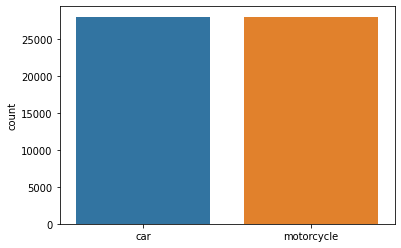

In [24]:
driving_modes = df_formatted.groupby('trj_id').apply(lambda x: x.iloc[0, 1])
sns.countplot(x = driving_modes)

Distribution of os

Different os might have different accuracy/bugs

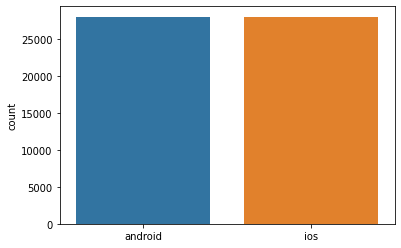

In [25]:
osnames = df_formatted.groupby('trj_id').apply(lambda x: x.iloc[0, 2])
sns.countplot(x = osnames)

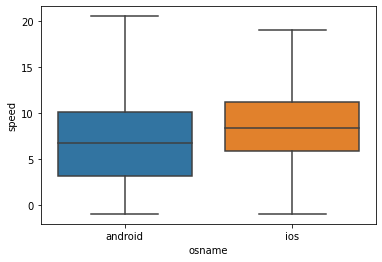

In [26]:
sns.boxplot(data = df_formatted, x = 'osname', y = 'speed', showfliers = False)

Which period of time is the busiest?

7-10am? 5-7pm?

discretization

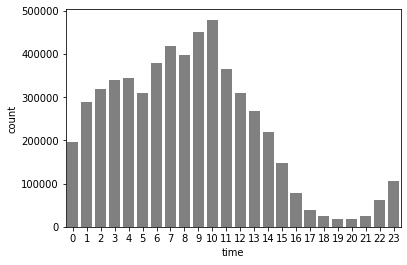

In [27]:
hours = df_formatted['time'].apply(lambda x: x.hour)
sns.countplot(x = hours, color = 'grey')

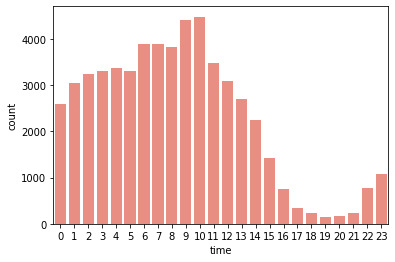

In [28]:
initial_pings = df_formatted.groupby('trj_id')['time'].min()
initial_pings_hours = initial_pings.apply(lambda x: x.hour)
sns.countplot(x = initial_pings_hours, color = 'salmon')

Geospatial plots

In [29]:
peak_period = df_formatted[(hours == 9) | (hours == 10)]

In [30]:
pings = peak_period[['rawlat', 'rawlng']].to_numpy()

In [31]:
pings

array([[ -6.2884636, 106.82497  ],
       [ -6.126547 , 106.84757  ],
       [ -6.1751027, 106.733864 ],
       ...,
       [ -6.5961776, 106.780945 ],
       [ -6.2874284, 107.022705 ],
       [ -6.3029685, 106.88474  ]], dtype=float32)

In [33]:
# create new figure
fig_peak_period = Figure(height = 550, width = 750)

# create new map
map_peak_period = folium.Map([sg_lat, sg_lng], zoom_start = 11,
                             min_zoom = 11, max_zoom = 16)
fig_peak_period.add_child(map_peak_period)

# create heatmap and add to map
plugins.HeatMap(pings, radius = 4, blur = 6).add_to(map_peak_period)

map_peak_period

In [ ]:
# get mean speed of each trajectory
mean_speed = peak_period.groupby('trj_id')['speed'].agg(mean_speed = ('mean'))

# extract trajectories with valid mean speed
mean_speed = mean_speed[mean_speed['mean_speed'].notnull()]

# sort by mean_speed
mean_speed.sort_values('mean_speed', inplace = True)

# retrieve slowest 3 trajectories 
slowest_trajectories = mean_speed.nsmallest(3, columns = 'mean_speed').index

In [ ]:
# function to get the lat and lng in an array given df and id
def get_route(df, trj_id):
    return df.query('trj_id == ' + f"'{trj_id}'").sort_values("pingtimestamp")[["rawlat", "rawlng"]]

In [ ]:
route_1 = get_route(df_formatted, slowest_trajectories[0])
route_2 = get_route(df_formatted, slowest_trajectories[1])
route_3 = get_route(df_formatted, slowest_trajectories[2])

In [ ]:
# function to get start and ending position of trajectory
def get_start_end_pos(trj):
  return (trj.iloc[0, :], trj.iloc[-1, :])

In [ ]:
# create new figure
fig_trj = Figure(height = 550, width = 750)

# add map to figure
m_trj = folium.Map(location = [sg_lat, sg_lng],
                tiles = 'cartodbpositron', zoom_start = 11,
                min_zoom = 11, max_zoom = 16)
fig_trj.add_child(m_trj)

# Creating feature groups
f1 = folium.FeatureGroup("Slowest")
f2 = folium.FeatureGroup("2nd Slowest")
f3 = folium.FeatureGroup("3rd Slowest")

# Adding lines to the different feature groups
line_1 = folium.vector_layers.PolyLine(route_1.values,
                                       popup = '<b>Path of Vehicle_1</b>',
                                       tooltip = 'Slowest',
                                       color = 'blue', weight = 1).add_to(f1)                                  
line_2 = folium.vector_layers.PolyLine(route_2.values,
                                       popup = '<b>Path of Vehicle_2</b>',
                                       tooltip = '2nd Slowest',
                                       color = 'red', weight = 1).add_to(f2)
line_3 = folium.vector_layers.PolyLine(route_3.values,
                                       popup = '<b>Path of Vehicle_3</b>',
                                       tooltip = '3rd Slowest',
                                       color = 'green', weight = 1).add_to(f3)

# add ploylines to map
f1.add_to(m_trj)
f2.add_to(m_trj)
f3.add_to(m_trj)

# get start and end points of each trajectory
route_1_positions = get_start_end_pos(route_1)
route_2_positions = get_start_end_pos(route_2)
route_3_positions = get_start_end_pos(route_3)

# add markers for trj 1
folium.Marker(
    location = [route_1_positions[0][0], route_1_positions[0][1]],
    popup = "start point",
    icon = folium.Icon(color = "green"),
).add_to(f1)

folium.Marker(
    location = [route_1_positions[1][0], route_1_positions[1][1]],
    popup = "start point",
    icon = folium.Icon(color = "red"),
).add_to(f1)

# trj 2
folium.Marker(
    location = [route_2_positions[0][0], route_2_positions[0][1]],
    popup = "start point",
    icon = folium.Icon(color = "green"),
).add_to(f2)

folium.Marker(
    location = [route_2_positions[1][0], route_2_positions[1][1]],
    popup = "start point",
    icon = folium.Icon(color = "red"),
).add_to(f2)

# trj 3
folium.Marker(
    location = [route_3_positions[0][0], route_3_positions[0][1]],
    popup = "start point",
    icon = folium.Icon(color = "green"),
).add_to(f3)

folium.Marker(
    location = [route_3_positions[1][0], route_3_positions[1][1]],
    popup = "start point",
    icon = folium.Icon(color = "red"),
).add_to(f3)

# add layer control to toggle layers
folium.LayerControl().add_to(m_trj)

m_trj

❗ Note that Folium cannot handle large amounts of data at a time. ❗